In [2]:
dataset_path = "/kaggle/input/ibc53-indian-bird-call-dataset/iBC53"

In [3]:
import librosa
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import warnings
import scipy
warnings.filterwarnings('ignore',".*PySoundFile")
import tensorflow as tf
import wave

In [4]:
# this will conatins key as a all birds name and value as a list of sound file pathname of that bird
dir_details_dict = {}

bird_species = os.listdir(dataset_path)

for bs in bird_species:
    dir_details_dict[bs] = []
    sound_path = os.path.join(dataset_path,bs)
    for sound_file in os.listdir(sound_path):
        dir_details_dict[bs].append(os.path.join(sound_path,sound_file))

# dir_details_dict

In [ ]:
# listen the sound of birdcall 

fname = dir_details_dict.get('Pomatorhinus ruficollis')[5]


wav = wave.open(fname)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

ipd.Audio(fname)


In [7]:
# see the dataset sample number over all dircetory
# getting the avg. sampling rate and total samples over the datset
# taking the sound filen having 41khz
# taking the sound file which have nly 20-40 sec of duration.


def get_filtered_dict(src_dict=dir_details_dict,sr=44100):
    dest_dict = {}
    for key,values in src_dict.items(): 
        dest_dict[key] = [] 
        for sound_file_path in values : 
            wav = wave.open(sound_file_path) 
            dur =  wav.getnframes()/wav.getframerate()
            if(wav.getframerate()==44100):
                dest_dict[key].append(sound_file_path)
    return dest_dict


def draw_details(dict_name):
    from pydub import AudioSegment

    dir_count = []
    sample_count = []
    audio_length = []
    sample_max_frame_rate = []
    sample_min_frame_rate = []

    for key,values in dict_name.items():
        dir_count.append(key)
        sample_count.append(len(values))  
 
        _frame_rate = []
        dur = []
        sound_file_name = []
        for sound_file_path in values : 
            wav = wave.open(sound_file_path)
            _frame_rate.append(wav.getframerate()) 
    #         print("Sampling (frame) rate = ", wav.getframerate())
    #         print("Total samples (frames) = ", wav.getnframes())
    #         print("Duration = ", wav.getnframes()/wav.getframerate())
            dur.append(wav.getnframes()/wav.getframerate())
            spl_path = str(sound_file_path).split("/")
            sound_file_name.append(str(spl_path[len(spl_path)-1]))
        try:
            sample_max_frame_rate.append(max(_frame_rate))
            sample_min_frame_rate.append(min(_frame_rate))
        except:
            pass
        
        # chceking avg time duration
#         fig = plt.figure(figsize = (30, 10))
#         plt.bar(sound_file_name, dur, color ='maroon',
#                 width = 0.4)
#         plt.xticks(rotation=90)
#         plt.xlabel("Sound File")
#         plt.ylabel("duration")
#         plt.title("Sound File vs duration")
#         plt.grid()
#         plt.title(str(key))
#         plt.show()

    fig = plt.figure(figsize = (30, 10))

    # creating the bar plot for species name vs sample count
    plt.bar(dir_count, sample_count, color ='maroon',
            width = 0.4)
    plt.xticks(rotation=90)
    plt.xlabel("species name")
    plt.ylabel("sample count")
    plt.title("species name vs sample count")
    plt.grid()
    plt.show()

    # creating the bar plot for species name vs max_frame_rate
    plt.bar(dir_count, sample_max_frame_rate, color ='green',
            width = 0.5)
    plt.xticks(rotation=90)
    plt.xlabel("species name")
    plt.ylabel("frame_rate")
    plt.title("species name vs sample count")
    plt.grid()
    plt.show()

    # creating the bar plot for species name vs min_frame_rate
    plt.bar(dir_count, sample_min_frame_rate, color ='blue',
            width = 0.5)
    plt.xticks(rotation=90)
    plt.xlabel("species name")
    plt.ylabel("frame_rate")
    plt.title("species name vs sample count")
    plt.grid()
    plt.show()

# draw_details(dir_details_dict)
# going for filtering the birds having 44kHz sampling rate only.Cause we have that max value available in our dataset.

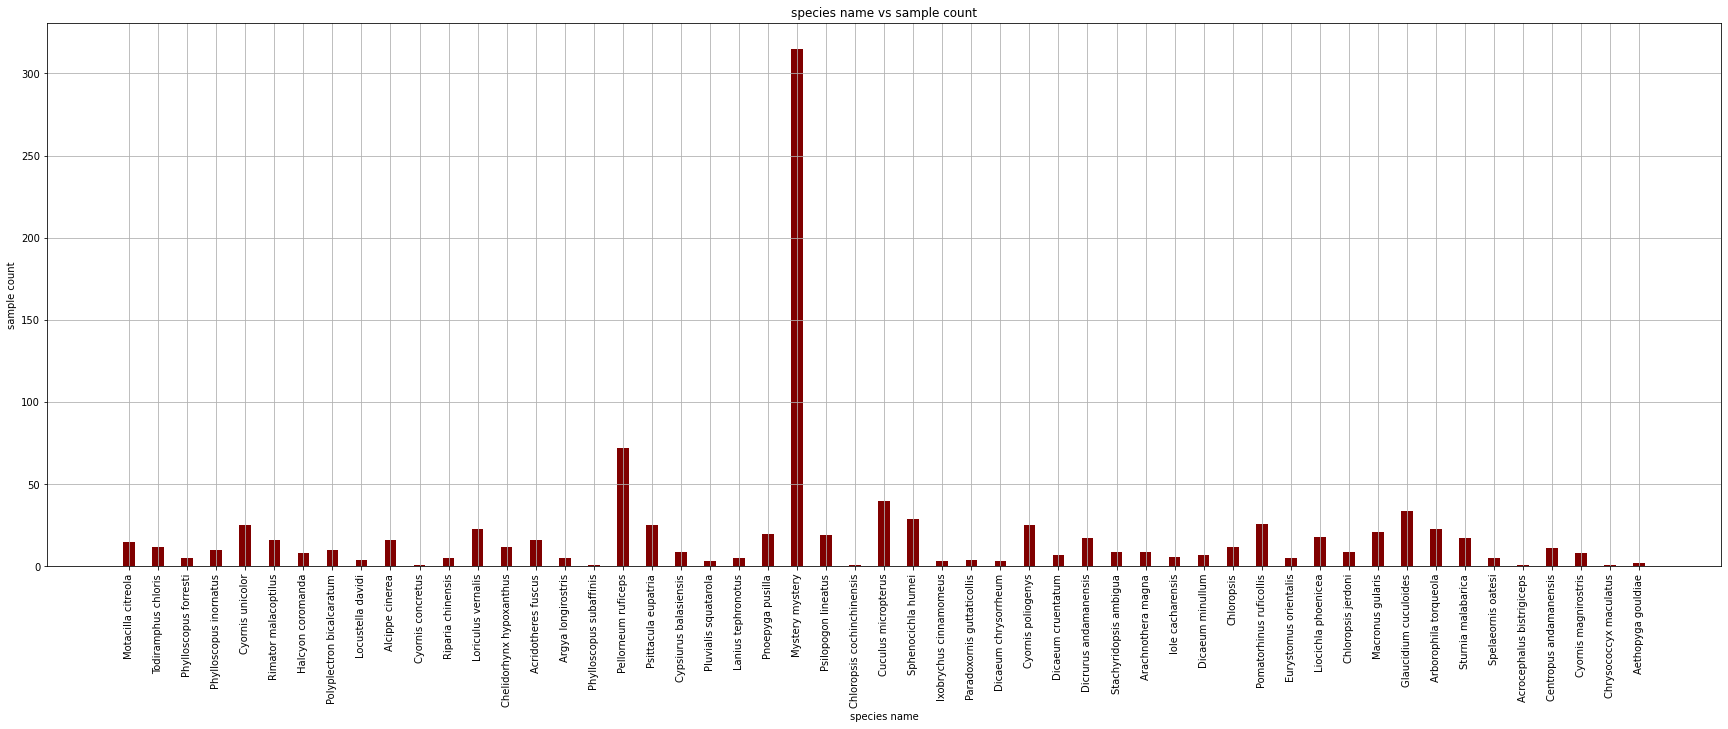

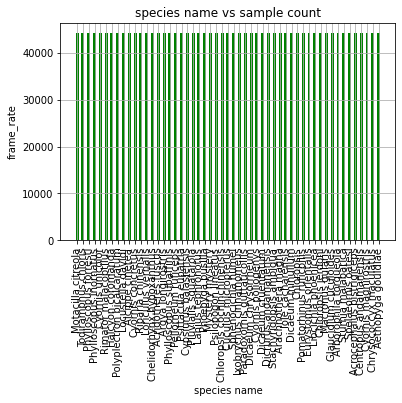

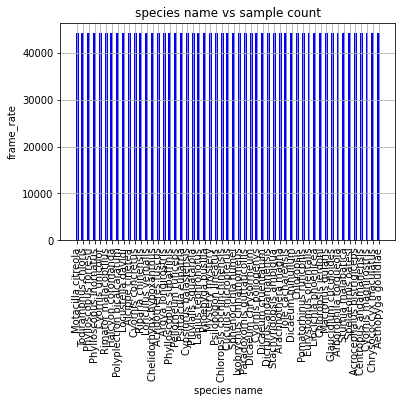

In [8]:
filtered_dir_details_dict= get_filtered_dict() 
draw_details(filtered_dir_details_dict)

In [9]:
# creating a csv for saving the categoriacl info for all bird call required in training

import pandas as pd

pd_dict = {
    "idx":[],
    "path":[]
}
count = 0
for keys,values in filtered_dir_details_dict.items():
    for val in values:
        pd_dict["idx"].append(count)
        pd_dict["path"].append(val)
    count+=1

df = pd.DataFrame(pd_dict)
# df.idx


In [11]:
# go for a train-validation split of the data
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(pd_dict["path"], pd_dict["idx"],
                                                    test_size = 0.2,
                                                    random_state = 1)

In [ ]:
y_train

In [ ]:
fname = '/kaggle/input/ibc53-indian-bird-call-dataset/iBC53/Motacilla citreola/17.wav'
SAMPLE_RATE = 44100 
wav, _ = librosa.core.load(fname, sr=SAMPLE_RATE)
wav = wav[:2*44100]
mfcc = librosa.feature.mfcc(wav, sr = SAMPLE_RATE, n_mfcc=40,n_fft=4096,hop_length=1024)
mfcc.shape
plt.imshow(mfcc, cmap='hot', interpolation='nearest');
# wav

# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(wav)

# wavwplot 

plt.figure(figsize=(10,5))
librosa.display.waveshow(audio_file,sr=SAMPLE_RATE)


plt.figure(figsize=(10,5))
librosa.display.waveshow(wav,sr=SAMPLE_RATE)
# spectogram

stft_time_series=librosa.stft(audio_file,n_fft=4096, hop_length=1024)
time_series_db=librosa.amplitude_to_db(abs(stft_time_series))
print(time_series_db.shape) 
plt.figure(figsize=(14,5))
librosa.display.specshow(time_series_db, sr=44000, x_axis='time', y_axis='hz') 
plt.colorbar()

In [12]:
# Building a config object to store the data
class Config(object):
    def __init__(self,
                 sampling_rate=16000, audio_duration=40, n_classes=53,
                 use_mfcc=False, n_folds=10, learning_rate=0.0001, 
                 max_epochs=50, n_mfcc=20):
        self.sampling_rate = sampling_rate
        self.audio_duration = audio_duration
        self.n_classes = n_classes
        self.use_mfcc = use_mfcc
        self.n_mfcc = n_mfcc
        self.n_folds = n_folds
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

        self.audio_length = self.sampling_rate * self.audio_duration
        if self.use_mfcc:
            self.dim = (self.n_mfcc, 1 + int(np.floor(self.audio_length/512)), 1)
        else:
            self.dim = (self.audio_length, 1)

# Using DataGenerator to generate the batch_data of 3 dimension 32X32000X1

In [13]:
# Normalization
# Normalization is a crucial preprocessing step. The simplest method is rescaling the range of features to scale the range in [0, 1].
def audio_norm(data):
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data+1e-6)
    return data-0.5

In [59]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, config, data_dir, list_IDs, labels=None, 
                 batch_size=32, preprocessing_fn=lambda x: x):
        self.config = config
        self.data_dir = data_dir
        self.list_IDs = list_IDs
        self.labels = labels
        self.batch_size = batch_size
        self.preprocessing_fn = preprocessing_fn
        self.on_epoch_end()
        self.dim = self.config.dim

    def __len__(self):
        return int(np.ceil(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        if self.labels is not None:
            label_temp = [self.labels[k] for k in indexes]
            return self.__data_generation(list_IDs_temp,label_temp)
        else:
            return self.__data_generation(list_IDs_temp,None)

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.list_IDs))

    def __data_generation(self, list_IDs_temp,label_temp):
        cur_batch_size = len(list_IDs_temp)
        X = np.empty((cur_batch_size, 20,3446,1))

        input_length = self.config.audio_length
#         print(input_length)
        for i, ID in enumerate(list_IDs_temp):
            file_path = ID
            
            # Read and Resample the audio
            data, _ = librosa.core.load(file_path, sr=self.config.sampling_rate,duration = 40,
                                        res_type='kaiser_fast')

#             # Random offset / Padding
#             if len(data) > input_length:
#                 max_offset = len(data) - input_length
#                 offset = np.random.randint(max_offset)
#                 data = data[offset:(input_length+offset)]
#             else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, input_length - len(data) - offset), "constant")
                
            # Normalization + Other Preprocessing
#             if self.config.use_mfcc:
            data = librosa.feature.mfcc(data, sr=self.config.sampling_rate,
                                               n_mfcc=self.config.n_mfcc)
            data = np.expand_dims(data, axis=-1)
#             else:
#                 data = self.preprocessing_fn(data)[:, np.newaxis]
#             print(data.shape)
            X[i,] = data

        if self.labels is not None:
            y = np.empty(cur_batch_size, dtype=int)
#             print(label_temp)
            i = 0 
            for lab in label_temp:
                y[i] = lab
                i+=1
#             print(y.shape)
            return X, tf.keras.utils.to_categorical(y, num_classes=self.config.n_classes)
        else:
            return X

In [30]:
config = Config(sampling_rate=44100, audio_duration=40, n_folds=10, learning_rate=0.001)
# if not COMPLETE_RUN:
#     config = Config(sampling_rate=100, audio_duration=1, n_folds=2, max_epochs=1)

In [31]:
train_generator = DataGenerator(config, dataset_path,df.path, 
                                    df.idx, batch_size=32,
                                    preprocessing_fn=audio_norm)

In [76]:
df[1:32].path

1     /kaggle/input/ibc53-indian-bird-call-dataset/i...
2     /kaggle/input/ibc53-indian-bird-call-dataset/i...
3     /kaggle/input/ibc53-indian-bird-call-dataset/i...
4     /kaggle/input/ibc53-indian-bird-call-dataset/i...
5     /kaggle/input/ibc53-indian-bird-call-dataset/i...
6     /kaggle/input/ibc53-indian-bird-call-dataset/i...
7     /kaggle/input/ibc53-indian-bird-call-dataset/i...
8     /kaggle/input/ibc53-indian-bird-call-dataset/i...
9     /kaggle/input/ibc53-indian-bird-call-dataset/i...
10    /kaggle/input/ibc53-indian-bird-call-dataset/i...
11    /kaggle/input/ibc53-indian-bird-call-dataset/i...
12    /kaggle/input/ibc53-indian-bird-call-dataset/i...
13    /kaggle/input/ibc53-indian-bird-call-dataset/i...
14    /kaggle/input/ibc53-indian-bird-call-dataset/i...
15    /kaggle/input/ibc53-indian-bird-call-dataset/i...
16    /kaggle/input/ibc53-indian-bird-call-dataset/i...
17    /kaggle/input/ibc53-indian-bird-call-dataset/i...
18    /kaggle/input/ibc53-indian-bird-call-datas

In [95]:
test_generator = DataGenerator(config, dataset_path,df[1:100].path, batch_size=32,
                                    preprocessing_fn=audio_norm)

In [87]:
ts_data = test_generator[1][0]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ... -2.1377563e-02
 -2.3956299e-02 -2.4932861e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: Pass y=[-9.1552734e-05  1.5258789e-04  2.1362305e-04 ...  6.8359375e-03
  5.9814453e-03  3.8757324e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: Pass y=[0.         0.         0.         ... 0.00062561 0.0002594  0.00050354] as keyword args. From version 0.10 passing these as positional argument

In [89]:
ts_data.shape

(20, 3446, 1)

In [32]:
train_generator[1][0].shape

1764000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ... -2.1377563e-02
 -2.3956299e-02 -2.4932861e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[-9.1552734e-05  1.5258789e-04  2.1362305e-04 ...  6.8359375e-03
  5.9814453e-03  3.8757324e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00062561 0.0002594  0.00050354] as keyword args. From version 0.10 passing these as positional argument

(32, 20, 3446, 1)

# Using Normal Process to generate the data for considering mutplie feature at a same time otherwise, it will be dimession of 4

In [45]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,ZeroPadding2D
from tensorflow.keras.optimizers import Adam

In [53]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (20, 3446, 1)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 3rd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 4th Convolutional Layer
model.add(Conv2D(filters=512, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
# Add output layer
model.add(Dense(53,activation="softmax"))

model.compile(loss='categorical_crossentropy',
          optimizer=Adam(learning_rate=0.001),
          metrics=['accuracy'])
    
     
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 20, 3446, 64)      640       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 10, 1723, 64)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 10, 1723, 128)     73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 861, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 5, 861, 256)       295168    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 2, 430, 256)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 2, 430, 512)      

In [54]:
# vgg19_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=31,
                   epochs=10)

1764000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06958008 -0.04550171
 -0.01989746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00675964 0.01585388 0.01734924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.21235657 0.21017456 0.20935059] as keyword args. From version 0.10 passing these as positional arguments will result in an error


Epoch 1/10
1764000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.00079346 -0.00074768  0.00065613 ... -0.00344849 -0.00263977
 -0.00114441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00964355 0.01113892 0.01219177] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ... -4.5318604e-03
 -1.8310547e-03 -5.3710938e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00294495 -0.00041199
  0.00219727] as keyword args. From version 0.10

1764000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 7.6293945e-05 -6.1035156e-05 -6.1035156e-05 ...  6.4392090e-03
  2.1072388e-02  1.4739990e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error


 1/31 [..............................] - ETA: 3:54 - loss: 36.9786 - accuracy: 0.0000e+00

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01498413 -0.01092529
 -0.00326538] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0037384  -0.0075531
 -0.01112366] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00086975 -0.0009613
 -0.0014801 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00602722 -0.00578308
 -0.00491333] as keyword args. From version 0.10 passing thes

1764000
 2/31 [>.............................] - ETA: 2:46 - loss: 2974.7517 - accuracy: 0.0000e+00

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00088501  0.00042725
 -0.00039673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01535034 -0.01420593
 -0.01368713] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13369751 -0.1338501
 -0.13232422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00392151 -0.00245667
 -0.00071716] as keyword args. From version 0.10 passing the

1764000
 3/31 [=>............................] - ETA: 2:51 - loss: 2226.1301 - accuracy: 0.0000e+00

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00067139 -0.00137329
 -0.00363159] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0118866  -0.01968384
 -0.01985168] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00857544 -0.00874329
 -0.00923157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00050354  0.00190735
 -0.00093079] as keyword args. From version 0.10 passing th

1764000
 4/31 [==>...........................] - ETA: 2:53 - loss: 1705.4978 - accuracy: 0.0000e+00

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.04658508 0.0428772  0.02964783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00068665  0.00244141
  0.00341797] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.06106567 0.03907776 0.0144043 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.00018311  0.00126648  0.00140381 ... -0.00088501 -0.00387573
 -0.00416565] as keyword args. From version 0.10 passing these as positio

1764000
 5/31 [===>..........................] - ETA: 2:49 - loss: 1370.1033 - accuracy: 0.0000e+00

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 1.5258789e-05  1.8310547e-04  3.0517578e-04 ... -5.8746338e-03
 -4.6234131e-03  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00469971 -0.00527954
 -0.00236511] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ... -6.7138672e-04
 -2.9144287e-03 -3.7841797e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00064087 -0.00518799
 -0.00799561] as keywor

1764000
 6/31 [====>.........................] - ETA: 2:42 - loss: 1144.8121 - accuracy: 0.0000e+00

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[-1.5258789e-05  0.0000000e+00  0.0000000e+00 ... -2.3727417e-02
 -3.9718628e-02 -3.5797119e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00 -6.1035156e-05 ... -7.3852539e-03
 -7.9040527e-03 -8.6669922e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ... -2.3498535e-03
 -2.9602051e-03 -5.0659180e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00354004  0.00164795
 -0.0

1764000
 7/31 [=====>........................] - ETA: 2:32 - loss: 985.8854 - accuracy: 0.0000e+00 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[-0.00036621 -0.00032043 -0.00015259 ... -0.08821106 -0.07897949
 -0.06173706] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[-0.0002594  -0.00154114 -0.00189209 ...  0.01083374  0.00834656
  0.0088501 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00222778 0.00747681 0.01254272] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[-0.01974487 -0.04202271 -0.06628418 ... -0.0098877  -0.00695801
 -0.02005005] as keyword args. From version 0.10 passing these as 

1764000
 8/31 [======>.......................] - ETA: 2:25 - loss: 863.9371 - accuracy: 0.0000e+00

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.0057373  0.00636292 0.00428772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.3732910e-04
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.00057983 0.00146484 0.00216675 ... 0.0050354  0.00302124 0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00131226 0.00149536 0.0010376 ] as keyword args. From version 0.10 passing these

1764000
 9/31 [=======>......................] - ETA: 2:19 - loss: 768.9186 - accuracy: 0.0000e+00

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00892639 0.00752258 0.0015564 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00392151 0.00305176 0.00228882] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00149536 0.00221252 0.00262451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.00291443  0.00534058  0.00613403 ... -0.0100708  -0.00460815
 -0.00076294] as keyword args. From version 0.10 passing these as positional arg

1764000
10/31 [========>.....................] - ETA: 2:13 - loss: 692.7867 - accuracy: 0.0000e+00

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[-3.0517578e-05 -1.5258789e-05  3.0517578e-05 ... -1.5258789e-03
 -1.1749268e-03 -9.6130371e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00387573 -0.00367737
 -0.00216675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00387573 -0.00283813
 -0.00231934] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00079346 0.00042725 0.00059509] as keyword args. From version 0.10

1764000
11/31 [=========>....................] - ETA: 2:07 - loss: 630.2978 - accuracy: 0.0000e+00

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.4801025e-03
 -1.3580322e-03  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.01538086 0.02200317 0.01757812 ... 0.0213623  0.02987671 0.02960205] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ... -3.6010742e-03
 -5.4473877e-03 -1.8310547e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00646973 0.00408936 0.00099182] as keyword args. From v

1764000
12/31 [==========>...................] - ETA: 2:02 - loss: 578.2117 - accuracy: 0.0000e+00

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ... -2.1377563e-02
 -2.3956299e-02 -2.4932861e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[-9.1552734e-05  1.5258789e-04  2.1362305e-04 ...  6.8359375e-03
  5.9814453e-03  3.8757324e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00062561 0.0002594  0.00050354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00125122 -0.00050354
  0.00033569] as keyword args.

1764000
13/31 [===========>..................] - ETA: 1:54 - loss: 534.0927 - accuracy: 0.0000e+00

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[-0.02020264 -0.02435303 -0.01675415 ... -0.36776733 -0.35601807
 -0.33605957] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00154114 0.00282288 0.00386047] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.02850342 0.03182983 0.02127075] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[-0.00012207 -0.00015259  0.00164795 ...  0.00106812  0.00201416
  0.00170898] as keyword args. From version 0.10 passing these as positio

1764000
14/31 [============>.................] - ETA: 1:48 - loss: 496.2374 - accuracy: 0.0045    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00035095 0.00033569 0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01425171 -0.0151062
 -0.01734924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -1.5258789e-05 ...  2.7465820e-03
  2.1667480e-03 -4.5776367e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error


1764000
15/31 [=============>................] - ETA: 1:41 - loss: 463.3237 - accuracy: 0.0583

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00079346 -0.00088501
 -0.00112915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.5258789e-04
  6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.5258789e-04
  3.0517578e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[-0.00015259  0.00019836  0.00059509 ... -0.00285339 -0.00238037
 -0.00205994] as keywor

1764000
16/31 [==============>...............] - ETA: 1:35 - loss: 434.4204 - accuracy: 0.1172

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.02270508  0.00791931
 -0.00727844] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.0007019  0.00048828 0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.5247803e-03
  4.5776367e-05 -5.7983398e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00071716  0.00054932
 -0.00013733] as keyword args. From version 0.10

1764000
17/31 [===============>..............] - ETA: 1:28 - loss: 409.4952 - accuracy: 0.1103

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00117493 0.00195312 0.00140381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00033569 0.00149536 0.00244141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.14282227 0.17245483 0.16906738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ... -1.4495850e-03
 -2.3651123e-03  1.8615723e-03] as keyword args. From version 0.10 passing these

1764000
18/31 [================>.............] - ETA: 1:22 - loss: 387.1296 - accuracy: 0.1042

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ...  8.5357666e-02
  8.8180542e-02  8.8241577e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.01669312 0.02232361 0.02255249] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00631714 0.0063324  0.00419617] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ...  6.4239502e-02
  6.9702148e-02  7.1014404e-02] as keyword args. From v

1764000
19/31 [=================>............] - ETA: 1:16 - loss: 367.0753 - accuracy: 0.0987

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[-0.01109314 -0.01063538 -0.00276184 ... -0.02026367 -0.01705933
 -0.02883911] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ... -2.8686523e-03
 -1.0665894e-02 -1.8905640e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00021362 0.00137329 0.00134277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 7.6293945e-05  1.2207031e-04 -3.0517578e-05 ... -3.2989502e-02
 -2.4353027e-02 -1.4968872e-02] as keyword args.

1764000
20/31 [==================>...........] - ETA: 1:10 - loss: 348.9389 - accuracy: 0.0938

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00454712 -0.00247192
 -0.00350952] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.5776367e-05
 -7.6293945e-05  1.3732910e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[-0.00012207  0.          0.00012207 ...  0.00283813  0.00495911
  0.00650024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00114441 0.00167847 0.00202942] as keyword args. From version 0.10

1764000
22/31 [====================>.........] - ETA: 56s - loss: 317.6906 - accuracy: 0.0881 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.02111816 -0.21134949
 -0.29206848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00222778  0.02053833
  0.02682495] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01306152 -0.01139832
 -0.01057434] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02676392 -0.02735901
 -0.02098083] as keyword args. From version 0.10 passing th

1764000
23/31 [=====================>........] - ETA: 50s - loss: 304.0481 - accuracy: 0.0870

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[6.1035156e-05 1.5258789e-05 6.1035156e-05 ... 6.6833496e-03 4.9743652e-03
 1.6174316e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 3.0517578e-05 ... 5.6152344e-03 4.1503906e-03
 2.6855469e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.02218628 0.01266479 0.0115509 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.01016235 0.00978088 0.00912476] as keyword args. From version 0.10 

1764000
24/31 [======================>.......] - ETA: 44s - loss: 291.5081 - accuracy: 0.0885

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.0022583  0.00328064 0.00289917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.00059509  0.00733948  0.01170349 ... -0.1418457  -0.12571716
 -0.11257935] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.00045776 -0.00184631  0.00013733 ... -0.00830078 -0.01522827
 -0.00917053] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ...  1.2664795e-03
  1.7700195e-03  5.6457520e-04] as keyword args. From version 0.10

1764000
25/31 [=======================>......] - ETA: 37s - loss: 280.0181 - accuracy: 0.0850

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ... -1.2207031e-03
  1.0681152e-03  3.7841797e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[1.5258789e-05 2.7465820e-04 5.7983398e-04 ... 3.2989502e-02 2.7587891e-02
 2.4749756e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01182556 -0.00991821
 -0.01004028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01202393 -0.01304626
 -0.01254272] as keyword args

1764000
26/31 [========================>.....] - ETA: 31s - loss: 269.4076 - accuracy: 0.0817

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00131226 -0.00132751
 -0.00143433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.01266479  0.01342773  0.0096283  ... -0.00709534 -0.00869751
 -0.00802612] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 1.0681152e-04 -9.1552734e-05 -1.5258789e-04 ...  3.2806396e-03
  3.2653809e-03  2.5482178e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.00015259 0.00038147 0.00137329 ... 0.00297546 0.00367737 0.00387573] as keyword args. From version 0.10

1764000
27/31 [=========================>....] - ETA: 24s - loss: 265.3344 - accuracy: 0.0805

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  3.0517578e-05 ...  6.8206787e-03
 -1.3610840e-02 -1.0559082e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.0000000e+00 1.5258789e-05 1.5258789e-05 ... 1.3549805e-02 5.9051514e-03
 4.7454834e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.00080872 0.00057983 0.00030518 ... 0.00189209 0.0116272  0.00172424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.00093079  0.00231934 -0.00039673 ...  0.01863098  0.01803589
  0.01350403] as keyword args. From 

1764000
28/31 [==========================>...] - ETA: 18s - loss: 255.8114 - accuracy: 0.0775

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.01004028 0.01174927 0.0128479 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0010376  -0.00082397
 -0.00073242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00045776 -0.00012207
 -0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0005188  -0.00076294
 -0.00117493] as keyword args. From version 0.10 passing these as 

1764000
29/31 [===========================>..] - ETA: 12s - loss: 246.9163 - accuracy: 0.0924

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[-0.00544739 -0.00871277 -0.01051331 ...  0.00645447  0.0080719
  0.0083313 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 1.5258789e-05 -1.5258789e-04 -3.0517578e-04 ... -2.7465820e-04
 -8.6975098e-04 -5.3405762e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00015259 0.00015259 0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00178528 -0.00161743
 -0.00119019] as keyword args. From version 0.10 

1764000
30/31 [============================>.] - ETA: 6s - loss: 238.6318 - accuracy: 0.1052 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00312805 0.00823975 0.0065918 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.00112915 -0.00175476 -0.0004425  ... -0.01715088 -0.01861572
 -0.01495361] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[-0.00265503 -0.0020752   0.00180054 ...  0.04647827  0.03164673
 -0.00627136] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00471497 0.00578308 0.00453186] as keyword args. From version 0.10 passing these as positio

1764000
31/31 [==============================] - 194s 6s/step - loss: 230.9263 - accuracy: 0.1017


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.00149536 0.0045929  0.00627136 ... 0.01290894 0.01298523 0.00349426] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.00216675 0.00418091 0.0045929  ... 0.05197144 0.04818726 0.04725647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[0.         0.         0.         ... 0.00756836 0.01104736 0.01275635] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00308228 -0.00238037
  0.00018311] as keyword args. From version 0.10 passing these as positional arg

Epoch 2/10
1764000
1764000
31/31 [==============================] - 165s 5s/step - loss: 3.9006 - accuracy: 0.2271
Epoch 3/10
1764000
1764000
31/31 [==============================] - 169s 5s/step - loss: 3.6795 - accuracy: 0.2641
Epoch 4/10
1764000
1764000
31/31 [==============================] - 167s 5s/step - loss: 3.5041 - accuracy: 0.3114
Epoch 5/10
1764000
1764000
31/31 [==============================] - 167s 5s/step - loss: 3.6536 - accuracy: 0.2970
Epoch 6/10
1764000
1764000
31/31 [==============================] - 170s 5s/step - loss: 3.5964 - accuracy: 0.3196
Epoch 7/10
1764000
1764000
31/31 [==============================] - 171s 5s/step - loss: 3.5957 - accuracy: 0.3237
Epoch 8/10
1764000
1764000
31/31 [==============================] - 168s 5s/step - loss: 3.4567 - accuracy: 0.2909
Epoch 9/10
1764000
1764000
31/31 [==============================] - 169s 5s/step - loss: 3.3640 - accuracy: 0.2909
Epoch 10/10
1764000
1764000
31/31 [==============================] - 165s 5s/ste

In [97]:
test_generator[1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ... -2.1377563e-02
 -2.3956299e-02 -2.4932861e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: Pass y=[-9.1552734e-05  1.5258789e-04  2.1362305e-04 ...  6.8359375e-03
  5.9814453e-03  3.8757324e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: Pass y=[0.         0.         0.         ... 0.00062561 0.0002594  0.00050354] as keyword args. From version 0.10 passing these as positional argument

array([[[[-647.55218506],
         [-647.55218506],
         [-647.55218506],
         ...,
         [-647.55218506],
         [-647.55218506],
         [-647.55218506]],

        [[   0.        ],
         [   0.        ],
         [   0.        ],
         ...,
         [   0.        ],
         [   0.        ],
         [   0.        ]],

        [[   0.        ],
         [   0.        ],
         [   0.        ],
         ...,
         [   0.        ],
         [   0.        ],
         [   0.        ]],

        ...,

        [[   0.        ],
         [   0.        ],
         [   0.        ],
         ...,
         [   0.        ],
         [   0.        ],
         [   0.        ]],

        [[   0.        ],
         [   0.        ],
         [   0.        ],
         ...,
         [   0.        ],
         [   0.        ],
         [   0.        ]],

        [[   0.        ],
         [   0.        ],
         [   0.        ],
         ...,
         [   0.        ],
        

In [100]:
# # test = model.predict(ts_data)
# ts_data.shape
test  = model.predict(x = test_generator[1])
# test = model.predict_generator(test_generator)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ... -2.1377563e-02
 -2.3956299e-02 -2.4932861e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: Pass y=[-9.1552734e-05  1.5258789e-04  2.1362305e-04 ...  6.8359375e-03
  5.9814453e-03  3.8757324e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: Pass y=[0.         0.         0.         ... 0.00062561 0.0002594  0.00050354] as keyword args. From version 0.10 passing these as positional argument

In [107]:
# test.shape
#  32 53
np.argmax(test[8])

23

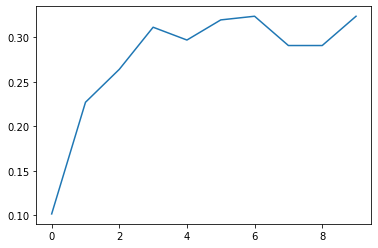

In [55]:
plt.plot(history.history['accuracy'])

In [ ]:

 
def extract_spectral_centroid(filename):
    y, sr = librosa.load(filename, duration=40, offset=0.5)
    spectral_centroid=librosa.feature.spectral_centroid(y, sr=sr)
    return spectral_centroid[0]
def extract_zero_crossing_rate(filename):
    y, sr = librosa.load(filename, duration=40, offset=0.5)
    zero_crossed_array=librosa.feature.zero_crossing_rate(y,pad=False) 
    return zero_crossing_rate

# for key,val in filtered_dir_details_dict.items():
#     for path in val:
#         zcr = extract_spectral_centroid(path)
#         print(zcr.shape)

def prepare_data(df, config):
    X = np.empty(shape=(df.shape[0], config.dim[0], config.dim[1], 1))
    print(X.shape)

    input_length = config.audio_length
    for i, fname in enumerate(df.path):
#         print(fname)
        file_path = fname
        data, _ = librosa.core.load(file_path, sr=config.sampling_rate, res_type="kaiser_fast")

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, input_length - len(data) - offset), "constant")

        data = librosa.feature.mfcc(data, sr=config.sampling_rate, n_mfcc=config.n_mfcc)
#         data = np.expand_dims(data, axis=-1)
        print(data)
#         X[i] = data
    return X

In [ ]:
X_train = prepare_data(df, config) 
y_train = to_categorical(df.idx, num_classes=config.n_classes)


In [ ]:

# reducelearningrate on platue
# preprocessing of the audio 
#     1. cut out all audio to same length
#     2. introduce some random noise, gaussian noise


In [ ]:
class extract_feature:
#     mel_spectogram, Tonnetz
    def __init__(self,audio_file,sampling_rate):
        self.audio_file=audio_file
        self.sampling_rate=sampling_rate
    def zero_crossing_rate(self):
        # 1.zero crossing rate : the rate at whichthe signal changes to positive from negative and vice-versa.
        zero_crossed_array=librosa.feature.zero_crossing_rate(self.audio_file,pad=False,zero_pos=True,hop_length=1024,frame_length=4096) 
        plt.figure(figsize=(15, 3))
        plt.plot(zero_crossed_array.T)
        return zero_crossed_array[0]
    def spectral_centroid(self):
        # it actualluy indicate the center of the mass of that whole sound based upon the frequecy.
        # If there are high frequencies at the end of sound then the centroid would be towards its end.
        spectral_centroid=librosa.feature.spectral_centroid(self.audio_file, sr=self.sampling_rate,n_fft=4096,hop_length=1024)
#         plt.figure(figsize=(15, 3))
#         plt.plot(spectral_centroid[0])
        return spectral_centroid[0]
    def mfcc(self):
#         mfcc is nothing but a coeeficent that actaully makes upto mel-scal(log scale representation to detect small
#         frequency changes).Here frequency bands are represnted by mel scale and we are able to see frq. change easily.
        mfcc=librosa.feature.mfcc(self.audio_file,sr=self.sampling_rate,n_fft=4096,hop_length=1024)
#         librosa.display.specshow(mfcc, sr=self.sampling_rate, x_axis='time')
        return mfcc
    def chroma(self):
#         We can use Chroma feature visualization to know how dominant the characteristics of a certain pitch 
#        {C, C♯, D, D♯, E, F, F♯, G, G♯, A, A♯, B} is present in the sampled frame.
        hop_length = 1024
        chromagram = librosa.feature.chroma_stft(self.audio_file, sr=self.sampling_rate, hop_length=hop_length)
#         fig, ax = plt.subplots(figsize=(15, 3))
#         img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
#         fig.colorbar(img, ax=ax)

        return chromagram
        
    def band_energy_ratio(self):
#         The Band Energy Ratio (BER) provides the relation between the lower and higher frequency bands. 
#         It can be thought of as the measure of how dominant low frequencies are.
#         This feature has been extensively used in music/speech discrimination, music classification etc.
#         High contrast values generally correspond to clear, narrow-band signals, while low contrast values correspond to broad-band noise.
         ber=librosa.feature.spectral_contrast(self.audio_file,sr=self.sampling_rate,n_fft=4096, hop_length=1024)
#          plt.figure(figsize=(15, 3))
#          plt.plot(ber[0])
         return ber[0]
    def spectral_flux(self):
#         A measure of how quickly the spectrum of a signal is changing. It is calculated by computing frame-to-frame
#         squared difference of the spectral magnitude vector summed across frequency.It provides a measure of the local
#         spectral rate of change. A high value of spectral flux indicates a sudden change in spectral magnitudes and
#         therefore a possible segment boundary at the  rth  frame.
        
        spec_flux= librosa.onset.onset_strength(self.audio_file,sr=self.sampling_rate,n_fft=4096,hop_length=1024)
#         onset_default = librosa.onset.onset_detect(self.audio_file,sr=self.sampling_rate, units='time')
#         plt.figure(figsize=(15, 3))
#         plt.plot(spec_flux)
        return spec_flux
    def spectral_rolloff(self):
#         Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.
        spectral_rolloff=librosa.feature.spectral_rolloff(self.audio_file,sr=self.sampling_rate,n_fft=4096,
                                                          hop_length=1024,roll_percent=0.85)
#         plt.figure(figsize=(15, 3))
#         plt.plot(spectral_rolloff[0])
        return spectral_rolloff[0]
    def rms(self):
#         Compute root-mean-square (RMS) value for each frame, either from the audio samples y or from a spectrogram S.
        rms_val=librosa.feature.rms(self.audio_file,frame_length=4096,hop_length=1024)
#         plt.figure(figsize=(15, 3))
#         plt.plot(rms_val[0])
        return rms_val[0]
    def chroma_sens(self):
#         The main idea of CENS features is that taking statistics over relatively large windows smooths out local deviations in tempo, articulation, and execution of note.
        chroma_sens=librosa.feature.chroma_cens(y=self.audio_file, sr=self.sampling_rate,hop_length=1024)
        return chroma_sens
#     Harmonics and Perceptrual
#     Tempogram
    def tempo(self):
#         calculate the onset first,then dynamic tempo
        onset_env=librosa.onset.onset_strength(y=self.audio_file, sr=self.sampling_rate,hop_length=1024)
        dtempo = librosa.beat.tempo(onset_envelope=onset_env, sr=self.sampling_rate,
                            aggregate=None)
        return dtempo
    def onset_strength(self):
        o_env = librosa.onset.onset_strength(self.audio_file, sr=self.sampling_rate,hop_length=1024) 
        times = librosa.times_like(o_env, sr=self.sampling_rate)
#         onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=self.sampling_rate)
        return times

In [ ]:
def create_feature_vector(ex):
    result=np.array([])
    
    mean_zero_crossing_rate=np.mean(ex.zero_crossing_rate(),axis=0)
    result=np.hstack((result,mean_zero_crossing_rate))
    
    mean_spectral_centroid=np.mean(ex.spectral_centroid(),axis=0)
    result=np.hstack((result,mean_spectral_centroid))
    
    mean_mfcc=np.mean(ex.mfcc()[1],axis=0)
    result=np.hstack((result,mean_mfcc))
    
    mean_chroma_sens=np.mean(ex.chroma_sens()[1],axis=0)
    result=np.hstack((result,mean_chroma_sens))
    
    mean_chroma=np.mean(ex.chroma()[1],axis=0)
    result=np.hstack((result,mean_chroma))
    
    mean_band_energy_ratio=np.mean(ex.band_energy_ratio(),axis=0)
    result=np.hstack((result,mean_band_energy_ratio))
    
    mean_spectral_rolloff=np.mean(ex.spectral_rolloff(),axis=0)
    result=np.hstack((result,mean_spectral_rolloff))
    
    mean_rms=np.mean(ex.rms(),axis=0)
    result=np.hstack((result,mean_rms))
    
    mean_spectral_flux=np.mean(ex.spectral_flux(),axis=0)
    result=np.hstack((result,mean_spectral_flux))
    
    mean_tempo=np.mean(ex.tempo(),axis=0)
    result=np.hstack((result,mean_tempo))
    
    mean_onset_strength=np.mean(ex.onset_strength(),axis=0)
    result=np.hstack((result,mean_onset_strength))
    return result

In [ ]:
# have to add padding to the extracted features

In [ ]:
# check wave plot for diff sound of bird

%matplotlib inline
for i in bird_species[:5] :
    audio_list = os.listdir(os.path.join(dataset_path,i)) 
    audio_path = os.path.join(dataset_path,i,audio_list[0])
    time_series_array , sampling_rate = librosa.load(audio_path , sr = 44000) 
    print(time_series_array.shape)
#     print("time series Array Shape : "+ time_series_array.shape())
    
#     plt.title("Bird Species : "+ i) 
#     plt.figure(figsize=(15,5))
#     librosa.display.waveshow(time_series_array,sr=sampling_rate)
    ex=extract_feature(time_series_array,44000) 
    ex.zero_crossing_rate()
#     create_feature_vector(ex.zero_crossing_rate())

In [ ]:
# https://www.kaggle.com/code/kedermallick/toxic-comment-classification
# https://www.kaggle.com/code/frlemarchand/bird-song-classification-using-an-efficientnet
# https://www.kaggle.com/code/fizzbuzz/beginner-s-guide-to-audio-data/notebook
# https://www.kaggle.com/code/riadalmadani/fastai-effb0-inf
# https://www.kaggle.com/code/hasanbasriakcay/birdclef22-eda-noise-reduction